In [19]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [20]:
# Read the CSV file using Pandas
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
# print(parent_directory)
file_path = os.path.join(parent_directory,"Task_3.csv")
data = pd.read_csv(file_path)
# Change the path as needed


# Split the data into features (X) and target variable (Y)
X = data[['Hours_of_Study', 'Hours_of_Sleep', 'Num_of_Practice_Tests']]
Y = data['Exam_Success']


In [21]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [22]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model (Accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


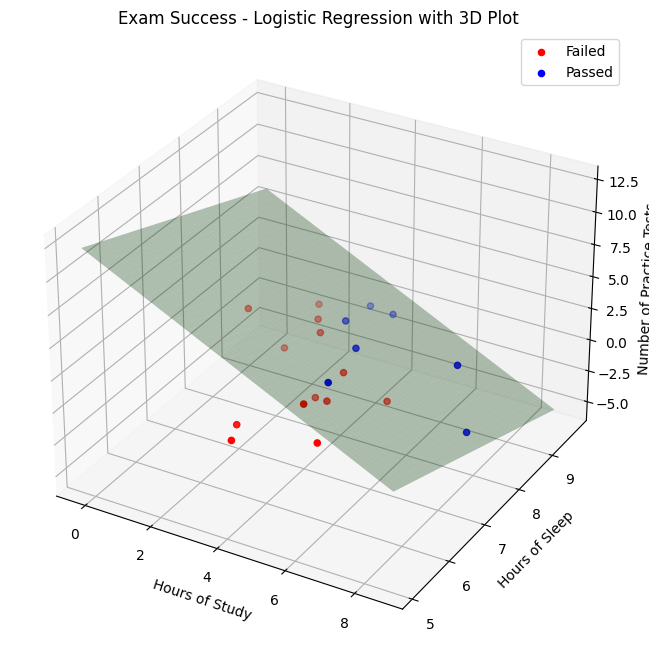

In [23]:
# Plot the decision boundary (linear) for two features
plt.figure(figsize=(10, 8))

# Plot the data points
ax = plt.subplot(111, projection='3d')
ax.scatter(X_test[Y_test == 0]['Hours_of_Study'], X_test[Y_test == 0]['Hours_of_Sleep'], X_test[Y_test == 0]['Num_of_Practice_Tests'], color='red', label='Failed')
ax.scatter(X_test[Y_test == 1]['Hours_of_Study'], X_test[Y_test == 1]['Hours_of_Sleep'], X_test[Y_test == 1]['Num_of_Practice_Tests'], color='blue', label='Passed')

# Plot the decision boundary (linear)
# refer link for decision boundary (linear)
# https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary

x_boundary = np.linspace(X['Hours_of_Study'].min(), X['Hours_of_Study'].max(), 100)
y_boundary = np.linspace(X['Hours_of_Sleep'].min(), X['Hours_of_Sleep'].max(), 100)
x_boundary, y_boundary = np.meshgrid(x_boundary, y_boundary)
z_boundary = (-model.intercept_ - model.coef_[0, 0] * x_boundary - model.coef_[0, 1] * y_boundary) / model.coef_[0, 2]
ax.plot_surface(x_boundary, y_boundary, z_boundary, alpha=0.3, color='green')

# Add labels and legend
ax.set_xlabel('Hours of Study')
ax.set_ylabel('Hours of Sleep')
ax.set_zlabel('Number of Practice Tests')
plt.legend()

# Show the plot
plt.title('Exam Success - Logistic Regression with 3D Plot')
plt.show()